In [224]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler, RobustScaler, QuantileTransformer
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy as sch
from scipy.cluster.hierarchy import linkage  
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import  pdist

In [225]:
data = pd.read_csv(r'clientes.csv')
data2 = pd.read_csv(r'clientes.csv')

In [226]:
data = data.drop('ID', axis = 1)

In [227]:
data.describe()

,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8,Prod9,Prod10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.491800,75.187100,34.014300,28.024400,10.566700,62.224700,27.522700,9.255700,6.804200,23.647800
std,28.178207,14.384665,2.004569,1.414003,5.760405,30.021924,20.447217,10.480014,13.516447,20.052121
min,0.000000,51.000000,31.000000,26.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,63.000000,32.000000,27.000000,6.000000,36.000000,13.000000,3.000000,1.000000,8.000000
50%,71.000000,75.000000,34.000000,28.000000,11.000000,82.000000,17.000000,5.000000,2.000000,15.000000
75%,73.000000,88.000000,36.000000,29.000000,16.000000,86.000000,53.000000,13.000000,5.000000,48.000000
max,75.000000,100.000000,37.000000,30.000000,20.000000,90.000000,65.000000,50.000000,60.000000,60.000000


In [228]:
data.isnull().sum()

Prod1     0
Prod2     0
Prod3     0
Prod4     0
Prod5     0
Prod6     0
Prod7     0
Prod8     0
Prod9     0
Prod10    0
dtype: int64

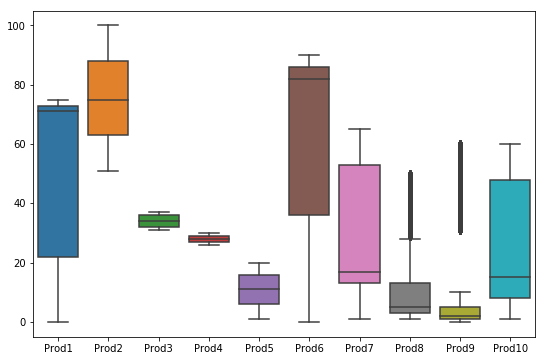

In [229]:
fig = plt.figure(figsize = (9,6))
sns.boxplot(data=data)
plt.show()

In [230]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

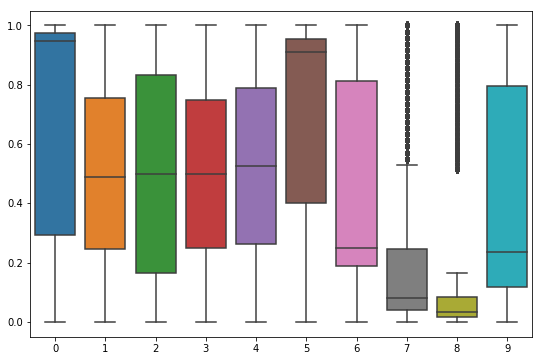

In [231]:
fig = plt.figure(figsize = (9,6))
sns.boxplot(data=data_transformed)
plt.show()

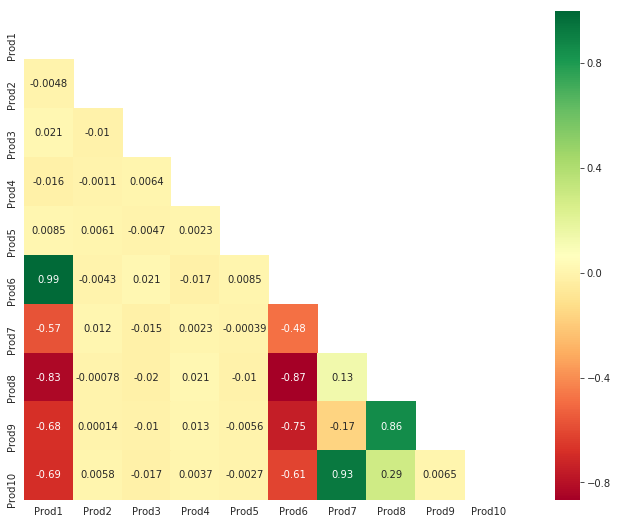

In [232]:
corr = data.corr()    # data frame correlation function
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 9))
    ax = sns.heatmap(corr, mask=mask, cmap='RdYlGn', square=True, annot=True)

In [264]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(data_transformed)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

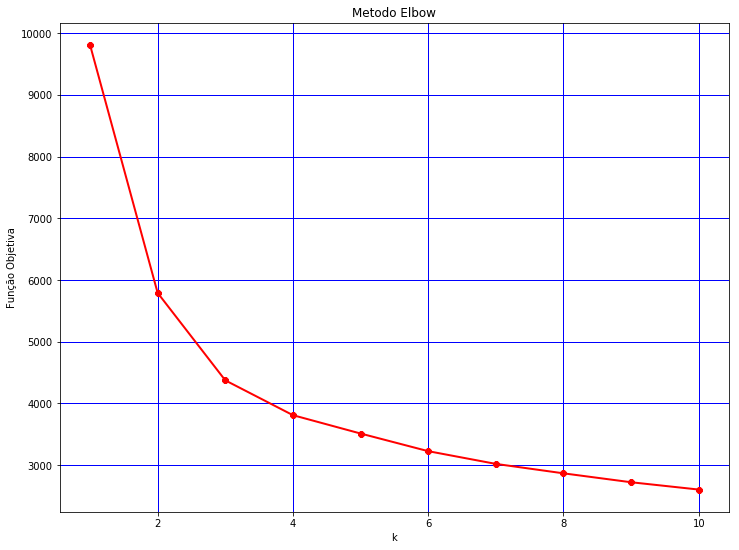

In [266]:
#Visualizing the ELBOW method to get the optimal value of K
plt.figure(figsize=(12,9))
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker ="8")
plt.title('Metodo Elbow')
plt.grid(color='b', linestyle='-', linewidth=1)
plt.xlabel('k')
plt.ylabel('Função Objetiva')
plt.savefig('cotovelo.png')
plt.show()

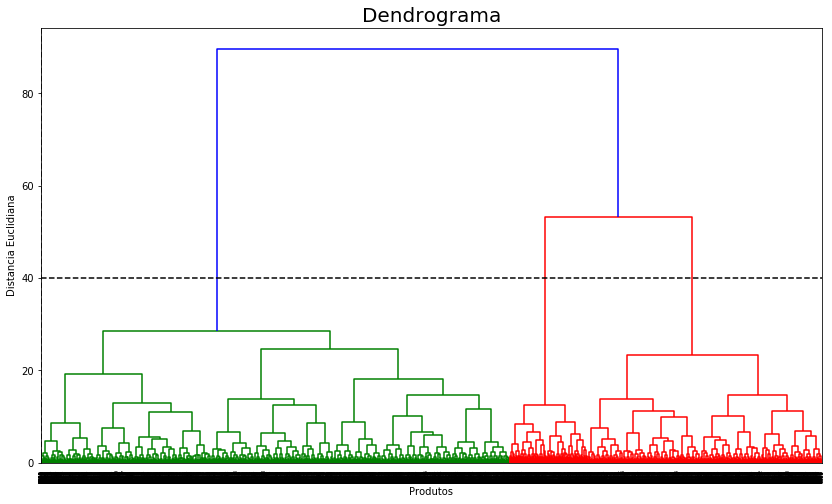

In [235]:
plt.figure(figsize=(14,8))
dendrogram=sch.dendrogram(sch.linkage(data_transformed, method = 'ward'))
plt.title('Dendrograma', fontsize = 20)
plt.xlabel('Produtos')
plt.ylabel('Distancia Euclidiana')
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [40,40],'--', c='k')
ax.plot(bounds,'--', c='k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4077040788718628
For n_clusters = 3 The average silhouette_score is : 0.44883092448788237
For n_clusters = 4 The average silhouette_score is : 0.29433924011696755
For n_clusters = 5 The average silhouette_score is : 0.28057492927414085
For n_clusters = 6 The average silhouette_score is : 0.21409914599590857


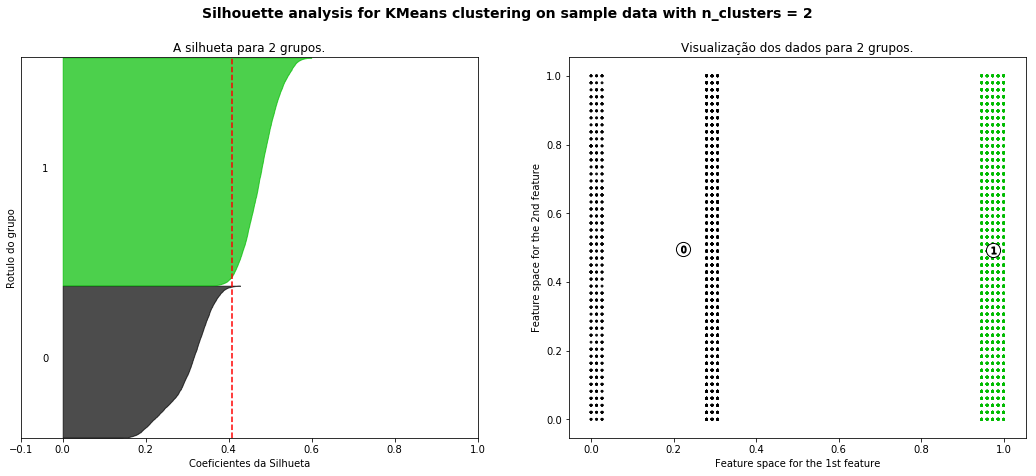

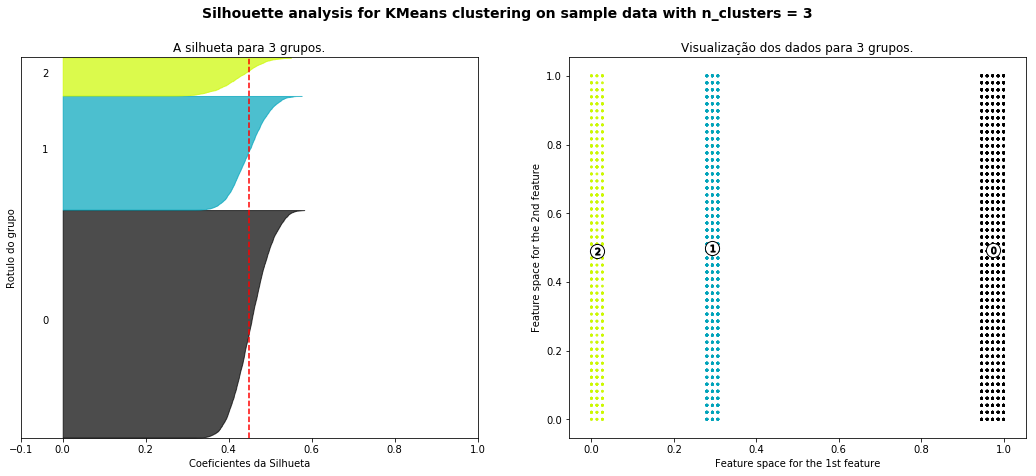

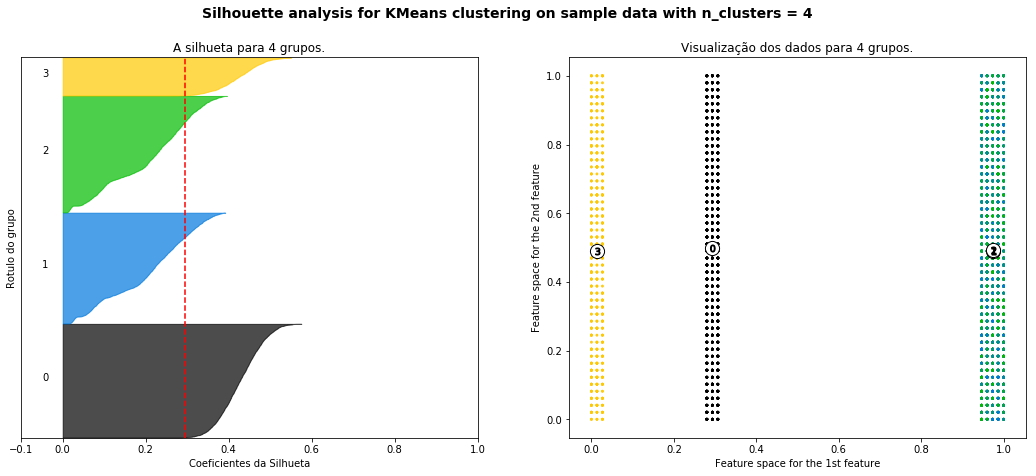

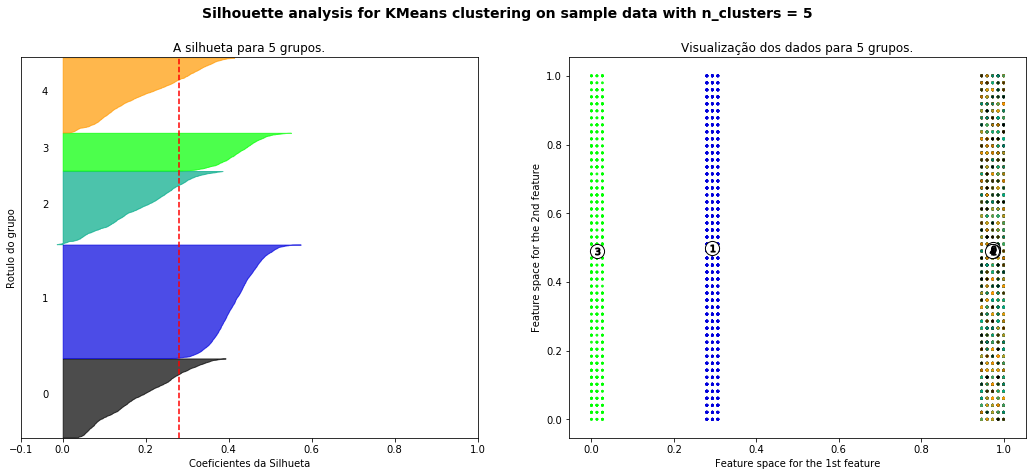

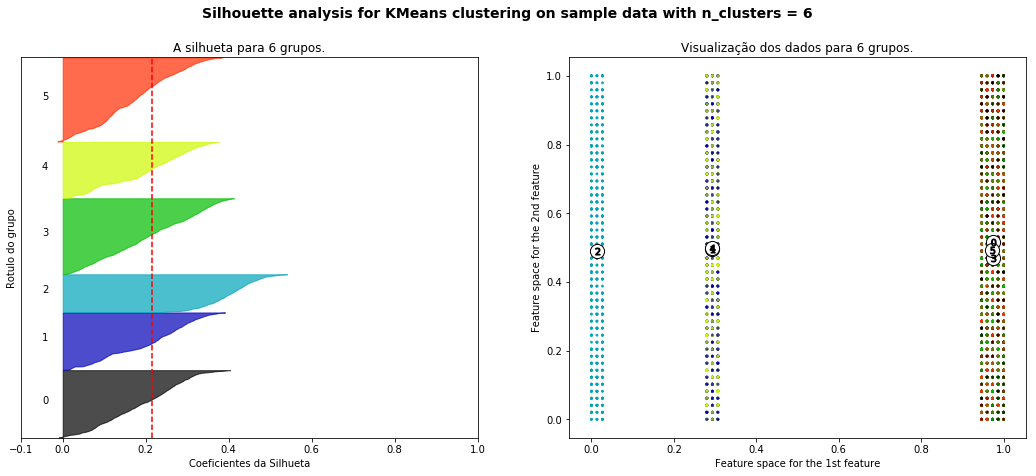

In [236]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_transformed) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_transformed)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_transformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_transformed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("A silhueta para " + str(n_clusters) + " grupos.")
    ax1.set_xlabel("Coeficientes da Silhueta")
    ax1.set_ylabel("Rotulo do grupo")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_transformed[:, 0], data_transformed[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualização dos dados para " + str(n_clusters) + " grupos.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.savefig('cluster' + str(n_clusters) +'.png')
plt.show()

In [237]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=42)
y_kmeans= kmeansmodel.fit_predict(data_transformed)
data["labels"] = y_kmeans

In [238]:
print(data["labels"].value_counts())

0    6000
1    3000
2    1000
Name: labels, dtype: int64


In [239]:
data

,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8,Prod9,Prod10,labels
0,21,80,37,27,5,38,55,7,4,54,1
1,23,83,37,30,12,32,61,10,9,48,1
2,22,96,35,28,3,32,64,6,4,50,1
3,71,58,34,26,6,88,13,1,0,20,0
4,22,84,32,29,14,31,52,19,4,48,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,74,78,31,29,15,85,17,3,1,19,0
9996,23,98,35,26,3,40,62,9,7,60,1
9997,22,74,33,26,5,33,63,17,10,60,1
9998,72,84,35,30,9,83,20,3,2,2,0


In [240]:
export_csv = data.to_csv (r'export_dataframe.csv', index = None, header=True)

In [241]:
print(data["labels"].value_counts())

0    6000
1    3000
2    1000
Name: labels, dtype: int64


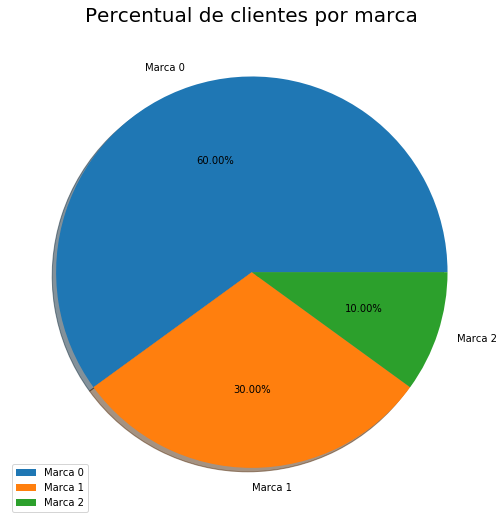

In [242]:
labels = ['Marca 0', 'Marca 1', 'Marca 2']
size = data["labels"].value_counts()

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Percentual de clientes por marca', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [243]:
cluster_0 = []
cluster_1 = []
cluster_2 = []
for i in range(10000):
    if data["labels"][i] == 0:
        cluster_0.append(data.iloc[i, :].values)
    if data["labels"][i] == 1:
        cluster_1.append(data.iloc[i, :].values)
    if data["labels"][i] == 2:
        cluster_2.append(data.iloc[i, :].values)

In [244]:
cluster_0 = pd.DataFrame(cluster_0)
cluster_0.columns = ['Prod1', 'Prod2', 'Prod3', 'Prod4', 'Prod5', 'Prod6', 'Prod7', 'Prod8', 'Prod9', 'Prod10', "Label"] 

In [245]:
cluster_1 = pd.DataFrame(cluster_1)
cluster_1.columns = ['Prod1', 'Prod2', 'Prod3', 'Prod4', 'Prod5', 'Prod6', 'Prod7', 'Prod8', 'Prod9', 'Prod10', "Label"] 

In [246]:
cluster_2 = pd.DataFrame(cluster_2)
cluster_2.columns = ['Prod1', 'Prod2', 'Prod3', 'Prod4', 'Prod5', 'Prod6', 'Prod7', 'Prod8', 'Prod9', 'Prod10', "Label"] 

In [247]:
cluster_0 = cluster_0.drop('Label', axis = 1)
cluster_1 = cluster_1.drop('Label', axis = 1)
cluster_2 = cluster_2.drop('Label', axis = 1)

In [248]:
cluster_0.sum()

Prod1     437950
Prod2     450649
Prod3     204302
Prod4     168053
Prod5      63622
Prod6     512939
Prod7      92855
Prod8      18165
Prod9       5934
Prod10     62513
dtype: int64

In [249]:
cluster_1.sum()

Prod1      65979
Prod2     226199
Prod3     101884
Prod4      84099
Prod5      31589
Prod6     106711
Prod7     174324
Prod8      39030
Prod9      16402
Prod10    158711
dtype: int64

In [250]:
cluster_2.sum()

Prod1       989
Prod2     75023
Prod3     33957
Prod4     28092
Prod5     10456
Prod6      2597
Prod7      8048
Prod8     35362
Prod9     45706
Prod10    15254
dtype: int64

In [251]:
total_0 = sum(cluster_0.sum())
total_1 = sum(cluster_1.sum())
total_2 = sum(cluster_2.sum())

In [252]:
total_produtos = total_0 + total_1 +total_2
total_produtos

3277394

In [253]:
porc_prod_c0 = (total_0 / total_produtos) * 100
porc_prod_c1 = (total_1 / total_produtos) * 100
porc_prod_c2 = (total_2 / total_produtos) * 100

In [254]:
data_porcentagem = []
data_porcentagem.append(porc_prod_c0)
data_porcentagem.append(porc_prod_c1)
data_porcentagem.append(porc_prod_c2)
data_porcentagem

[61.542249726459495, 30.66241043951383, 7.795339834026668]

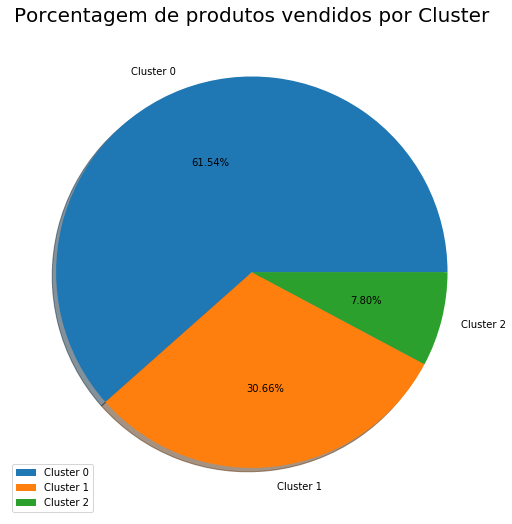

In [255]:
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

size = data_porcentagem

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Porcentagem de produtos vendidos por Cluster', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

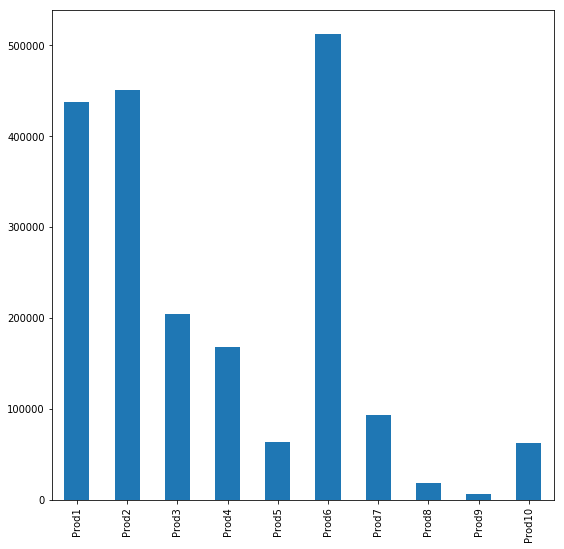

In [256]:
cluster_0.sum().plot.bar()

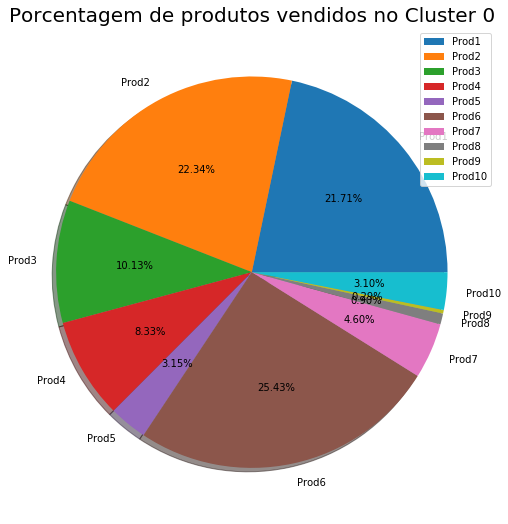

In [257]:
labels = ['Prod1', 'Prod2', 'Prod3', 'Prod4', 'Prod5', 'Prod6', 'Prod7', 'Prod8', 'Prod9', 'Prod10']
size = cluster_0.sum()

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Porcentagem de produtos vendidos no Cluster 0', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

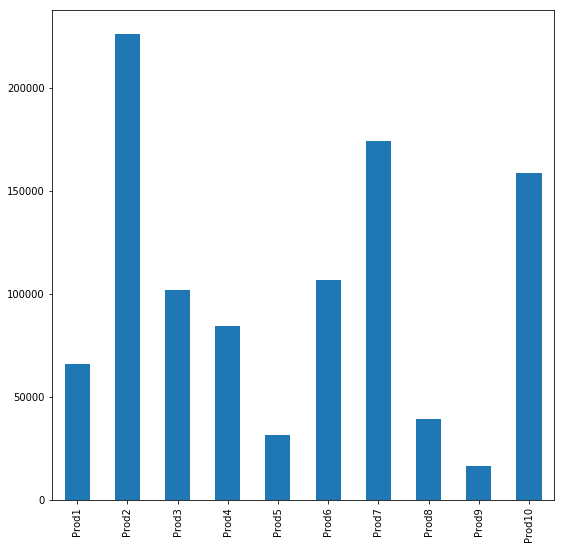

In [258]:
cluster_1.sum().plot.bar()

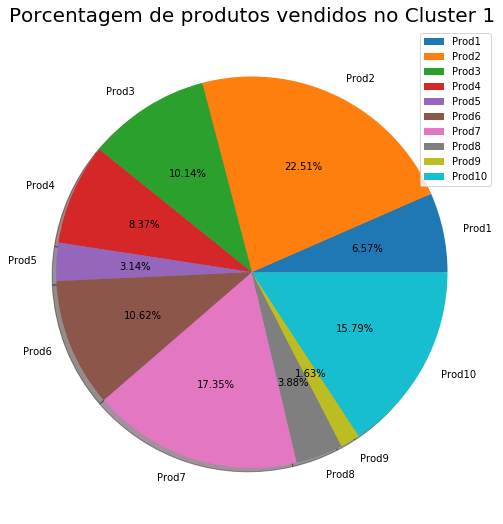

In [259]:
labels = ['Prod1', 'Prod2', 'Prod3', 'Prod4', 'Prod5', 'Prod6', 'Prod7', 'Prod8', 'Prod9', 'Prod10']
size = cluster_1.sum()

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Porcentagem de produtos vendidos no Cluster 1', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

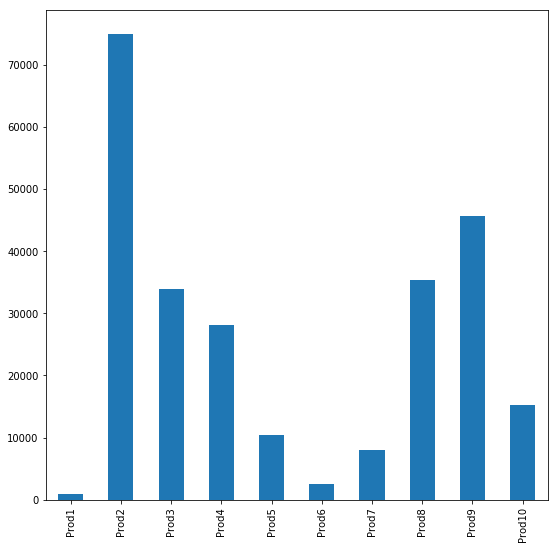

In [260]:
cluster_2.sum().plot.bar()

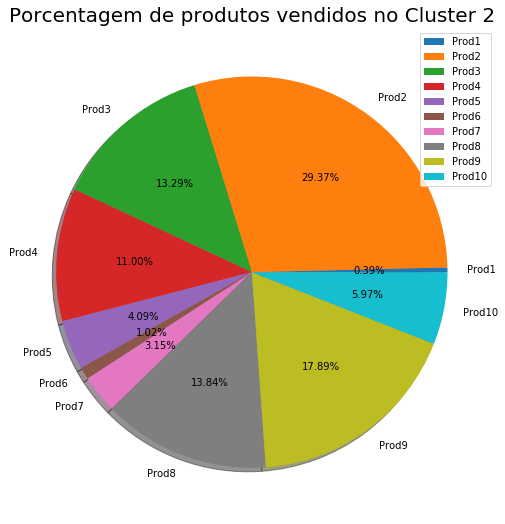

In [261]:
labels = ['Prod1', 'Prod2', 'Prod3', 'Prod4', 'Prod5', 'Prod6', 'Prod7', 'Prod8', 'Prod9', 'Prod10']
size = cluster_2.sum()

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Porcentagem de produtos vendidos no Cluster 2', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [262]:
soma_produtos_total = cluster_0.sum() + cluster_1.sum() + cluster_2.sum()
soma_produtos_total

Prod1     504918
Prod2     751871
Prod3     340143
Prod4     280244
Prod5     105667
Prod6     622247
Prod7     275227
Prod8      92557
Prod9      68042
Prod10    236478
dtype: int64

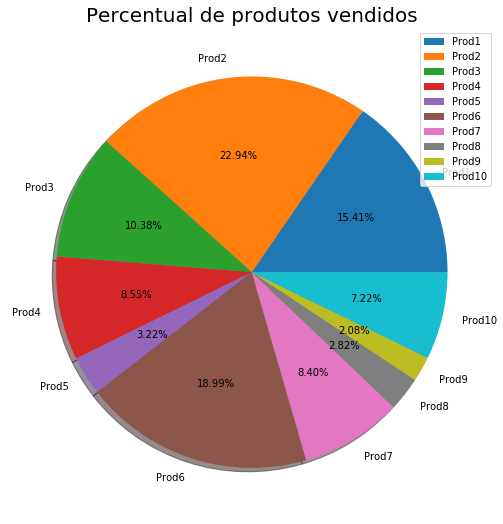

In [263]:
labels = ['Prod1', 'Prod2', 'Prod3', 'Prod4', 'Prod5', 'Prod6', 'Prod7', 'Prod8', 'Prod9', 'Prod10']
size = soma_produtos_total

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Percentual de produtos vendidos', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()